In [38]:
# import libraries
import pandas as pd 
import numpy as np
import glob
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# load TPRDB library
sys.path.append('/data/critt/tprdb/bin/')
import TPRDB
import importlib
importlib.reload(TPRDB)

<module 'TPRDB' from '/data/critt/tprdb/bin/TPRDB.py'>

In [39]:
# read Arabic and Spanish data
segments = TPRDB.readTPRDBtables(["CLASSES_SI/Tables/", "classar_SI/Tables/"], "*sg", path="/data/critt/tprdb/ATA22/", verbose = 1)

pd.set_option('display.max_columns', 500)
segments.head(20)


CLASSES_SI/Tables/	#sessions:8	*sg:94
classar_SI/Tables/	#sessions:14	*sg:164


,Id,Study,Session,SL,TL,Task,Text,Part,STseg,TTseg,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN
0,1,CLASSES_SI,P02_T1,en,es,T,1,P02,1,1,1,166522,166522,34327,114545,17650,42,106553,25642,21,100751,31444,12,94190,38005,8,80346,51849,4,0.05,144,39570,109,42149,0,0,0,0,148,11,16,109,19,139,0,---,Muchos_críticos_del_sistema_actual_de_bienesta...,1.00,1.00,3.31,0.00,0.06,0.19,0.25,4.25,0.85
1,2,CLASSES_SI,P02_T1,en,es,T,1,P02,2,2,1,428451,428451,44884,350275,33292,89,335460,48107,51,318456,65111,26,297587,85980,12,289357,94210,9,0.28,219,69390,494,192021,0,0,0,0,265,102,26,161,29,164,0,---,"Ellos_sostienen_que_esas_normas_,_que_excluyen...",0.88,0.88,2.35,0.08,0.27,0.27,0.42,4.94,0.87
2,3,CLASSES_SI,P02_T1,en,es,T,1,P02,3,3,1,209266,209266,16960,160576,31730,47,150477,41829,21,144685,47621,13,134626,57680,6,121633,70673,2,0.22,109,29746,159,50589,0,0,0,0,235,6,33,197,35,231,0,---,"Entonces_,_ellos_concluyen_que_la_ampliación_d...",1.00,1.12,1.67,0.33,0.61,0.55,0.85,5.68,0.94
3,4,CLASSES_SI,P02_T1,en,es,T,1,P02,4,4,1,151359,151359,57571,73246,20542,69,64435,29353,46,44866,48922,18,34886,58902,10,9984,83804,1,0.11,22,5466,101,51061,0,0,0,0,174,54,16,96,19,124,0,---,Si_todas_las_familias_pobres_pudieran_recibir_...,1.00,1.12,2.06,0.12,0.38,0.44,0.56,4.56,0.91
4,5,CLASSES_SI,P02_T1,en,es,T,1,P02,5,5,1,38609,38609,6407,13301,18901,19,10589,21613,12,4620,27582,4,0,32202,0,0,32202,0,0.01,42,8118,78,20516,0,0,0,0,137,1,19,117,21,136,0,---,La_respuesta_a_esta_pregunta_depende_de_la_imp...,1.11,1.11,1.89,0.32,0.47,0.58,0.68,4.77,0.91
5,6,CLASSES_SI,P02_T1,en,es,T,1,P02,6,6,1,176898,176898,113890,34180,28828,43,26441,36567,21,17541,45467,8,10161,52847,2,7935,55073,1,0.04,9,1573,52,18602,0,0,0,0,215,9,37,212,36,208,0,---,Esa_es_la_pareja_infelizmente_casada_que_perma...,1.03,1.11,1.81,0.19,0.46,0.54,0.76,5.80,0.93
6,7,CLASSES_SI,P02_T1,en,es,T,1,P02,7,7,1,116416,116416,4958,79809,31649,41,73045,38413,22,65352,46106,11,56548,54910,4,49552,61906,1,0.05,47,12275,97,34744,0,0,0,0,232,10,36,204,38,223,0,---,"La_formación_,_el_mantenimiento_y_la_disolució...",1.08,1.11,1.47,0.17,0.42,0.53,0.67,5.56,0.90
7,8,CLASSES_SI,P02_T1,en,es,T,1,P02,8,8,2,169620,169620,139731,14225,15664,17,12102,17787,11,9267,20622,7,0,29889,0,0,29889,0,0.03,12,3243,55,19828,0,0,0,0,117,2,20,114,20,117,0,---,El_mayor_beneficio_que_genera_la_creación_de_u...,1.00,1.00,1.50,0.15,0.35,0.65,0.75,4.97,0.93
8,9,CLASSES_SI,P02_T1,en,es,T,1,P02,9,9,1,278963,278963,106849,146833,25281,43,140588,31526,27,129702,42412,12,120905,51209,6,106197,65917,2,0.12,76,21177,141,54957,0,0,0,0,177,15,25,154,27,164,0,---,Los_beneficios_de_tal_asociación_dependen_de_g...,1.16,1.16,1.80,0.36,0.60,0.52,0.72,5.25,0.93
9,10,CLASSES_SI,P02_T1,en,es,T,1,P02,10,10,1,60879,60879,5621,40442,14816,26,37168,18090,18,30634,24624,10,22240,33018,4,14546,40712,2,0.02,6,1230,63,25075,0,0,0,0,121,6,14,102,18,118,0,---,Las_personas_con_capacidades_productivas_simil...,1.07,1.00,2.21,0.07,0.43,0.50,0.57,4.38,0.91


# Histogram Duration

<AxesSubplot:ylabel='Frequency'>

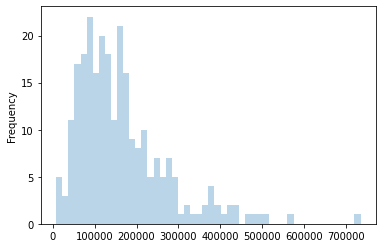

In [44]:
segments["Dur"].plot.hist(alpha=0.3, bins=50)

In [46]:
# Log Transform 
segments['DurLog'] = np.log(segments['Dur'] + 1) 

# Normalized duration (divide by number of ST tokens)
segments['nDurS'] = segments['Dur']  /  segments['TokS'] 
# Normalized duration (divide by number of TT tokens)
segments['nDurT'] = segments['Dur']  /  segments['TokT'] 

segments['nDurSLog'] = np.log(segments['nDurS'] + 1) 
segments['nDurTLog'] = np.log(segments['nDurT'] + 1) 

segments.describe()


,Id,Text,STseg,TTseg,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN,DurLog,nDurS,nDurT,nDurSLog,nDurTLog
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.0,258.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,6.391473,2.461240,6.391473,6.391473,1.209302,164033.658915,161846.476744,30121.356589,115099.608527,18812.693798,59.170543,106350.810078,27561.492248,36.166667,94485.806202,39426.496124,19.089147,82546.523256,51365.779070,10.437984,64083.922481,69828.379845,4.627907,0.209961,103.426357,29234.151163,94.821705,30265.406977,0.0,0.0,0.0,0.0,154.395349,33.263566,24.666667,140.751938,20.941860,122.480620,0.0,0.933256,1.223837,1.863721,0.721434,1.064457,0.903876,1.226938,5.173256,0.861977,11.796882,6984.606100,8436.856759,8.671385,8.854139
std,3.428798,1.126463,3.428798,3.428798,0.656300,108198.435441,103578.993342,34059.928439,93396.747097,11295.158767,32.607947,90265.636454,13381.962061,21.568986,85438.367439,18375.557707,12.608278,79749.215106,24330.387003,7.604399,71922.374760,34859.723436,4.206850,0.925953,93.010001,31145.984878,93.247418,32639.839318,0.0,0.0,0.0,0.0,82.841503,45.830260,9.277254,52.744525,9.342203,54.768363,0.0,0.186621,0.364814,0.951631,0.415173,0.452110,0.347183,0.434068,0.589029,0.064110,0.688443,5225.332132,5869.568803,0.573585,0.607608
min,1.000000,1.000000,1.000000,1.000000,1.000000,8257.000000,8257.000000,253.000000,1251.000000,2839.000000,3.000000,0.000000,3915.000000,0.000000,0.000000,6115.000000,0.000000,0.000000,6115.000000,0.000000,0.000000,6115.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,23.000000,0.000000,5.000000,29.000000,4.000000,23.000000,0.0,0.330000,0.330000,0.600000,0.000000,0.060000,0.190000,0.250000,2.920000,0.680000,9.018938,1462.000000,1063.272727,7.288244,6.970047
25%,3.000000,1.000000,3.000000,3.000000,1.000000,89156.750000,89156.750000,9610.000000,48529.250000,11231.000000,36.000000,44001.500000,18315.000000,21.000000,33916.000000,26681.500000,10.000000,28338.750000,33094.750000,5.000000,16721.250000,43508.000000,2.000000,0.050000,36.250000,9945.500000,32.000000,5971.250000,0.0,0.0,0.0,0.0,101.250000,7.250000,17.000000,99.500000,15.000000,85.250000,0.0,0.810000,1.000000,1.232500,0.320000,0.600000,0.580000,0.800000,4.830000,0.810000,11.398154,3975.219394,4878.565217,8.288048,8.492811
50%,6.000000,2.000000,6.000000,6.000000,1.000000,138146.000000,138146.000000,19677.000000,88991.000000,16246.500000,52.000000,81158.000000,25882.500000,31.500000,72588.000000,36780.000000,16.000000,61026.000000,47570.500000,9.000000,42814.000000,64138.500000,3.000000,0.120000,79.000000,19677.500000,70.000000,21555.500000,0.0,0.0,0.0,0.0,135.000000,17.000000,23.000000,137.000000,19.000000,113.000000,0.0,0.915000,1.130000,1.650000,0.860000,1.220000,0.960000,1.380000,5.230000,0.870000,11.836073,5676.972222,7036.581818,8.644349,8.859016
75%,9.000000,3.750000,9.000000,9.000000,1.000000,209877.250000,209877.250000,38358.500000,151331.000000,22818.500000,78.750000,137700.750000,33955.250000,47.000000,121204.750000,48682.750000,25.750000,107832.500000,66652.250000,14.000000,80783.750000,89307.000000,7.000000,0.210000,144.750000,39146.000000,131.000000,42038.000000,0.0,0.0,0.0,0.0,188.250000,41.000000,31.000000,184.500000,25.000000,149.750000,0.0,1.050000,1.397500,2.190000,1.070000,1.41000

<AxesSubplot:ylabel='Frequency'>

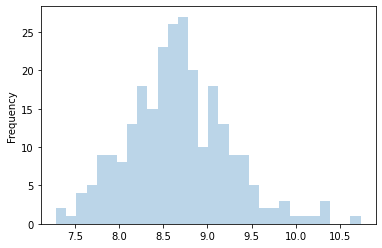

In [49]:
# plot log-transformed Typing Duration

#segments["DurLog"].plot.hist(alpha=0.3, bins=30)
#segments["nDurTLog"].plot.hist(alpha=0.3, bins=30)
segments["nDurSLog"].plot.hist(alpha=0.3, bins=30)


## Correlation Matrix

# Correlation

measures the strength of a linear association between two variables $X:\{x_1 ... x_n\}$ and $Y:\{y_1 ... y_n\}$.
A correlation value $r = 1$ means there is a perfect positive correlation and the value $r = -1$ means a perfect negataive correlation between $X$ and $Y$.

There are different ways to compute correlations: e.g. Pearson, Spaerman, Kendall. 

Requirements for Pearson's correlation coefficient:
- Scale of measurement should be interval orratio
- Variables should be approximately normally distributed
- The association should be linear
- There should be no outliers in the data

Formula of Pearson correlation:  $r = \frac{\sum_i{(x_i - \bar{x_i}) (y_i - \bar{y_i})}} 
           {\sqrt{\sum_i{(x_i - \bar{x_i})^2}}{\sqrt{\sum_i{(y_i - \bar{y_i})^2}}}} $


where: 

- $\bar{x}$: the mean of the $X$ values: $\frac{1}{n} \sum_i^n{x_i}$
- $\bar{y}$: the mean of the $Y$ values: $\frac{1}{n} \sum_i^n{y_i}$

    sometimes $\bar{x}$ is also written as $\mu$


### Spearman correlation $\rho$ (roh)
The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables.
measure of rank correlation, dependence between the rankings of two variables.

$$\rho ={\frac {\operatorname {cov} ({\operatorname {R}} (X), {\operatorname {R}} (Y))}{\sigma_{{\operatorname {R}} (X)}\sigma _{\operatorname {R} (Y)}}}$$

where: 

- $\operatorname {cov} (\operatorname {R} (X), \operatorname {R} (Y))$: is the covariance of the rank variables
- $\sigma_{\operatorname {R} (X)}$ and $\sigma _{\operatorname {R} (Y)}$: are the standard deviations of the rank variables.

  

               Dur    DurLog     nDurS     nDurT  nDurSLog  nDurTLog
Dur       1.000000  1.000000  0.795522  0.730040  0.795522  0.730040
DurLog    1.000000  1.000000  0.795522  0.730040  0.795522  0.730040
nDurS     0.795522  0.795522  1.000000  0.867409  1.000000  0.867409
nDurT     0.730040  0.730040  0.867409  1.000000  0.867409  1.000000
nDurSLog  0.795522  0.795522  1.000000  0.867409  1.000000  0.867409
nDurTLog  0.730040  0.730040  0.867409  1.000000  0.867409  1.000000


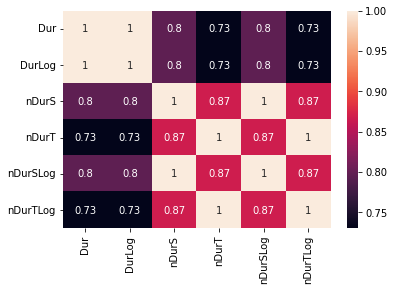

In [53]:
# Correlation matrix 
D = ["Dur", "DurLog","nDurS", "nDurT", "nDurSLog", "nDurTLog"]

# compute and plot correlation matrix
#corrMatrix = segments[D].corr(method="pearson")
corrMatrix = segments[D].corr(method="spearman")
print(corrMatrix)

# more fancy visualization of correlation matrix\
sns.heatmap(corrMatrix, annot=True)
plt.show()


# Insertions & Deletions

many different normalizations possible

               Ins       Del     nInsS     nInsT  nInsSLog  nInsTLog
Ins       1.000000  0.790515  0.672685  0.547119  0.645642  0.534147
Del       0.790515  1.000000  0.812516  0.846793  0.703411  0.800304
nInsS     0.672685  0.812516  1.000000  0.756358  0.947933  0.715180
nInsT     0.547119  0.846793  0.756358  1.000000  0.650468  0.973309
nInsSLog  0.645642  0.703411  0.947933  0.650468  1.000000  0.654529
nInsTLog  0.534147  0.800304  0.715180  0.973309  0.654529  1.000000


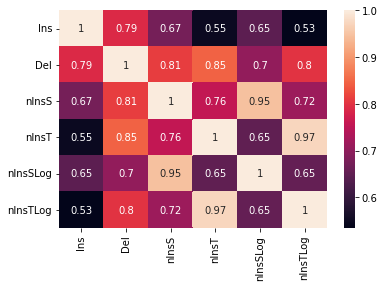

In [57]:
# Normalize insertions / deletions by ST / TT

segments['Key'] = segments['Ins'] + segments['Del'] 

segments['nInsS'] = (segments['Ins'] + 1) / segments['TokS'] 
segments['nInsT'] = (segments['Ins'] + 1) / segments['TokT'] 
segments['nDelS'] = (segments['Del'] + 1) / segments['TokS'] 
segments['nDelT'] = (segments['Del'] + 1) / segments['TokT'] 

segments['nInsSLog'] = np.log(segments['nInsS']) 
segments['nInsTLog'] = np.log(segments['nInsT']) 
segments['nDelSLog'] = np.log(segments['nDelS']) 
segments['nDelTLog'] = np.log(segments['nDelT']) 

ID = ["Ins", "Del", "nInsS","nInsT","nInsSLog", "nInsTLog"]

#pd.plotting.scatter_matrix(segments[ID], figsize=(25, 25))
#plt.show()

# compute and plot correlation matrix
corrMatrix = segments[ID].corr(method="pearson")
print(corrMatrix)

# more fancy visualization of correlation matrix\
sns.heatmap(corrMatrix, annot=True)
plt.show()


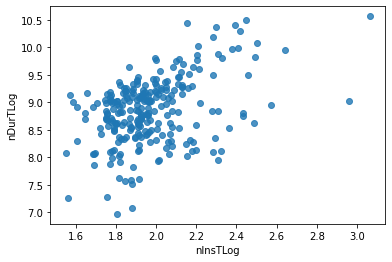

In [58]:
# scatter Plot: relate two variables
plt.scatter(segments['nInsTLog'],segments['nDurTLog'], alpha=0.8)
plt.xlabel('nInsTLog')
plt.ylabel('nDurTLog')
plt.show()